In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from interpret import glassbox
import joblib

In [19]:
df = pd.read_csv('Doceree_Complete_DataSet\Doceree-HCP_Train.csv', encoding='latin1')

In [20]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.2+ MB


In [22]:
for i in df.columns:
    if len(set(df[i]))<=60:
        print(f"{i}  {set(df[i])}")

DEVICETYPE  {'Mobile', 'Unknown', 'Tablet', 'Desktop'}
PLATFORM_ID  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16}
PLATFORMTYPE  {'Medical News Platform', 'Online Learning Portal', 'Online Medical Journal', 'Electronic Health Record', 'Tele-medicine Platform'}
CHANNELTYPE  {'Website'}
IS_HCP  {0.0, 1.0, nan}


In [23]:
le_devicetype=LabelEncoder()
le_devicetype.fit(df['DEVICETYPE'])
df['DEVICETYPE']=le_devicetype.transform(df['DEVICETYPE'])

le_platformtype=LabelEncoder()
le_platformtype.fit(df['PLATFORMTYPE'])
df['PLATFORMTYPE']=le_platformtype.transform(df['PLATFORMTYPE'])

le_channeltype=LabelEncoder()
le_channeltype.fit(df['CHANNELTYPE'])
df['CHANNELTYPE']=le_channeltype.transform(df['CHANNELTYPE'])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  int32  
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  int32  
 9   CHANNELTYPE      113937 non-null  int32  
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int32(3), int64(2), object(7)
memory usage: 10.9+ MB


In [25]:
df.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64

In [26]:
#Frequently occuring values in a dataset
for i in df.columns:
    if i!='ID':
        print(i)
        print(df[i].mode()[0])
        print(f'{(df[i].value_counts()[df[i].mode()[0]]/len(df[i]))*100} % ')
        print('========================')

DEVICETYPE
0
68.83014297374865 % 
PLATFORM_ID
2
69.46909256870025 % 
BIDREQUESTIP
71.105.120.171
1.5078508298445632 % 
USERPLATFORMUID
3e2578c8-f794-41af-a38c-c5cfb3c0f014
1.2700000877678015 % 
USERCITY
New York
4.338362428359533 % 
USERZIPCODE
63169.0
1.857166679831837 % 
USERAGENT
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36
7.354941766063702 % 
PLATFORMTYPE
3
96.64990301657934 % 
CHANNELTYPE
0
100.0 % 
URL
https://www.clinicaladvisor.com/home/features/clinical-challenge/pain-tingling-and-limited-range-of-motion-after-a-cat-bite-to-the-finger/
4.66047025988046 % 
KEYWORDS
Family Practice|Drainage|Clinical|Dermatology|Ophthalmology|Medicine|Allergic|General|Diagnosis|Neurology|Hepatology|Health|Cardiovascular|Surgical|Psychiatry|Oral|Urology|Cardiology|Gastroenterology|Orthopedics|Erythema|Arthritis|Asthma|Cellulitis|Pediatrics|Surgery|False|Oncology|Rheumatology
4.666614005985764 % 
TAXONOMY
2084P0800X
6.9599866592941

## Inferences:

- **CHANNELTYPE** - All data points are filled with 'Website'. Every user accesses through website channel. It is a redundant column
- **PLATFORMTYPE** - 96% of users visit Online Medical Journals. 
- **IS_HCP** - 70 % of users are not HCP. Might lead to overfitting of the data due to imbalance of information
- **DEVICETYPE** - 68% of users use desktop
- **PLATFORMID** - 69 % of users used platform of ID=2


## CORRELATION HEATMAP

In [27]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = df
data.fillna(0,inplace=True)  # Replace NaN with 0
for column in data.columns:
    if type(data[column][0])==str:
        print(column)
        data[column] = data[column].astype(str)
        data[column] = LabelEncoder().fit_transform(data[column])
data['TAXONOMY']=LabelEncoder().fit_transform(data['TAXONOMY'].astype(str))
data.drop(columns=['CHANNELTYPE'],inplace=True)
corr_mat=[]
for i in data.columns:
    temp=[]
    for j in data.columns:
        temp.append(spearmanr(data[i],data[j]).correlation)
    corr_mat.append(temp)


BIDREQUESTIP
USERPLATFORMUID
USERCITY
USERAGENT
URL
KEYWORDS


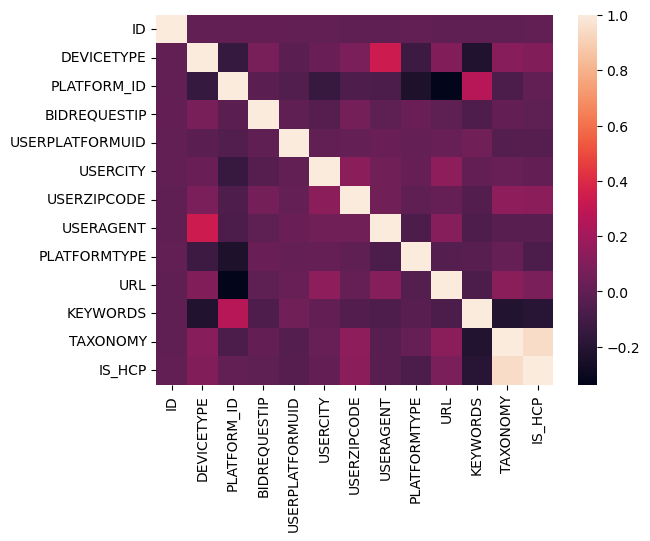

In [29]:
sns.heatmap(data=corr_mat,xticklabels=data.columns,yticklabels=data.columns)
plt.show()

### Inferences:

- High positive correlation between taxonomy and is_hcp 

In [30]:
df

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,0,2,6580,22184,3178,97206.0,2858,3,666,459,0,0.0
1,1002,0,2,19253,40577,131,22202.0,2673,3,708,109,0,0.0
2,1003,0,2,19704,34969,2702,83654.0,2673,3,666,459,0,0.0
3,1004,0,3,4193,14677,2,229114624.0,2946,3,327,274,150,1.0
4,1005,1,7,10056,33845,1768,77008.0,4050,3,1631,258,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,114933,0,2,22037,1064,3068,19120.0,2589,3,819,149,70,1.0
113933,114934,0,2,435,10706,4044,914014213.0,3019,3,852,68,150,1.0
113934,114935,0,7,10581,32809,2,98105.0,2651,3,1576,922,113,1.0
113935,114936,1,2,22764,36869,4323,19808.0,3848,3,2387,1680,150,1.0


In [31]:
print(df.info())
X=df.drop(columns=['IS_HCP','TAXONOMY'],inplace=False)
y=df['IS_HCP']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  int32  
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  int32  
 4   USERPLATFORMUID  113937 non-null  int32  
 5   USERCITY         113937 non-null  int32  
 6   USERZIPCODE      113937 non-null  float64
 7   USERAGENT        113937 non-null  int32  
 8   PLATFORMTYPE     113937 non-null  int32  
 9   URL              113937 non-null  int32  
 10  KEYWORDS         113937 non-null  int32  
 11  TAXONOMY         113937 non-null  int32  
 12  IS_HCP           113937 non-null  float64
dtypes: float64(2), int32(9), int64(2)
memory usage: 7.4 MB
None


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from xgboost import XGBClassifier

model1 = XGBClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(accuracy_score(y_test, y_pred))


c:\Users\Haresh\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Haresh\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:12:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9910918027031771


In [69]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.9871423556257679


In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9910479199578726


In [71]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.39011760575741616


In [72]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9889854309285588


In [73]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8781814990345796


In [74]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9229857819905213


In [75]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7388537826926452


In [76]:
model=glassbox.ExplainableBoostingClassifier()
model.fit(X_train,y_train)


ExplainableBoostingClassifier()

In [77]:
y_pred=model.predict(X_test)

In [78]:
print(accuracy_score(np.array(y_test.astype(str)),y_pred))

0.9724855186940495


In [34]:
# Fit the model to the training data
model1.fit(X_train, y_train)

# Save the model to an HDF5 file
joblib.dump(model1, 'XGBoost.h5')

c:\Users\Haresh\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Haresh\anaconda3\envs\tf_gpu\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:12:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['XGBoost.h5']

In [37]:
df = pd.read_csv('Doceree_Complete_DataSet\Doceree-HCP_Test.csv', encoding='latin1')


In [38]:
df.iloc[0]

ID                                                            115501
DEVICETYPE                                                   Desktop
PLATFORM_ID                                                        2
BIDREQUESTIP                                          75.189.231.103
USERPLATFORMUID                 0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4
USERCITY                                                Fayetteville
USERZIPCODE                                                  28305.0
USERAGENT          Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...
PLATFORMTYPE                                  Online Medical Journal
CHANNELTYPE                                                  Website
URL                https://www.clinicaladvisor.com/home/features/...
KEYWORDS           Family Practice|Drainage|Clinical|Dermatology|...
Name: 0, dtype: object

In [39]:
le_devicetype=LabelEncoder()
le_devicetype.fit(df['DEVICETYPE'])
df['DEVICETYPE']=le_devicetype.transform(df['DEVICETYPE'])

le_platformtype=LabelEncoder()
le_platformtype.fit(df['PLATFORMTYPE'])
df['PLATFORMTYPE']=le_platformtype.transform(df['PLATFORMTYPE'])

le_channeltype=LabelEncoder()
le_channeltype.fit(df['CHANNELTYPE'])
df['CHANNELTYPE']=le_channeltype.transform(df['CHANNELTYPE'])


In [40]:
from scipy.stats import spearmanr

data = df
data.fillna(0,inplace=True)  # Replace NaN with 0
for column in data.columns:
    if type(data[column][0])==str:
        print(column)
        data[column] = data[column].astype(str)
        data[column] = LabelEncoder().fit_transform(data[column])
data.drop(columns=['CHANNELTYPE'],inplace=True)
corr_mat=[]
for i in data.columns:
    temp=[]
    for j in data.columns:
        temp.append(spearmanr(data[i],data[j]).correlation)
    corr_mat.append(temp)


BIDREQUESTIP
USERPLATFORMUID
USERCITY
USERAGENT
URL
KEYWORDS


In [41]:
df

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,URL,KEYWORDS
0,115501,0,2,12370,934,858,28305.0,1231,3,529,326
1,115502,1,2,6273,14067,560,16316.0,2120,3,2263,354
2,115503,0,2,2996,4186,593,91724.0,1329,3,2289,0
3,115504,0,7,10011,4300,324,11226.0,1357,3,777,412
4,115505,0,2,11871,16621,1610,30062.0,1444,3,2491,877
...,...,...,...,...,...,...,...,...,...,...,...
28488,143989,0,2,9597,8439,324,11215.0,1395,3,2529,818
28489,143990,0,7,12415,11616,1694,33178.0,1492,3,1113,1490
28490,143991,0,7,1744,12155,904,33314.0,1329,3,1153,1494
28491,143992,0,8,8432,15542,1,0.0,1035,3,173,1639


In [42]:
# Load the model from the saved file
loaded_model = joblib.load('XGBoost.h5')

# Use the loaded model for prediction or further processing
predictions = loaded_model.predict(df)

In [44]:
predictions

array([1., 0., 0., ..., 1., 0., 0.])

In [46]:
data = {
    'UserID': df['ID'],
    'predictions': predictions.astype(int)
    
}

df_csv = pd.DataFrame(data)
file_path = 'Doceree-HCP_Submission(Dream EPic).csv'
# Save the DataFrame to a CSV file
df_csv.to_csv(file_path, index=False)

In [ ]:
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)

In [87]:
data = {
    'ID': [1001],
    'DEVICETYPE': [0],
    'PLATFORM_ID': [2],
    'BIDREQUESTIP': [6580],
    'USERPLATFORMUID': [22184],
    'USERCITY': [3178],
    'USERZIPCODE': [97206.0],
    'USERAGENT': [2858],
    'PLATFORMTYPE': [3],
    'URL': [666],
    'KEYWORDS': [459]
}


data = {
    'ID': [114936],
    'DEVICETYPE': [1],
    'PLATFORM_ID': [2],
    'BIDREQUESTIP': [22764],
    'USERPLATFORMUID': [36869],
    'USERCITY': [4323],
    'USERZIPCODE': [19808.0],
    'USERAGENT': [3848],
    'PLATFORMTYPE': [3],
    'URL': [2387],
    'KEYWORDS': [1680]
}


df = pd.DataFrame(data)

In [88]:
predictions = loaded_model.predict(df)

In [89]:
predictions

array([1])